### Numpy basics

In [2]:
import numpy as np
import math as mt

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
#1 senza usare le funzioni

m = np.arange(12).reshape((3,4))
shape = m.shape

row_m = np.zeros((shape[0],1))
col_m = np.zeros((shape[1],1))
overall_m = 0.

#media dei valori in ogni riga
for i in range(shape[0]):
    for j in range(shape[1]):
        row_m[i] += m[i,j]
row_m /= shape[1]
print("Vector of row means:\n", row_m)

#media dei valori in ogni colonna
for i in range(shape[1]):
    for j in range(shape[0]):
        col_m[i] += m[j,i]
col_m /= shape[0]
print("Vector of column means:\n", col_m)

#media complessiva
for i in range(shape[0]):
    for j in range(shape[1]):
        overall_m += m[i,j]
overall_m /= (shape[0]*shape[1])
print("Overall mean:", overall_m)

Vector of row means:
 [[ 1.5]
 [ 5.5]
 [ 9.5]]
Vector of column means:
 [[ 4.]
 [ 5.]
 [ 6.]
 [ 7.]]
Overall mean: 5.5


In [4]:
#1 usando le funzioni di numpy

print("Row means:\n", m.mean(axis=1))
print("Column means:\n", m.mean(axis=0))
print("Overall mean:", m.mean())


Row means:
 [ 1.5  5.5  9.5]
Column means:
 [ 4.  5.  6.  7.]
Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [5]:
#2.a
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

w = np.outer(u,v)
print(w)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [6]:
#2.b.con il for
shape_u = u.shape
shape_v = v.shape
w = np.zeros((shape_u[0],shape_v[0]))

for i in range(shape_u[0]):
    for j in range(shape_v[0]):
        w[i,j] = u[i]*v[j]
print(w)

#2.b con una lista 
z = np.array([u[i]*v[j] for i in range(shape_u[0]) for j in range(shape_v[0])]).reshape((shape_u[0],shape_v[0]))
print(z)

[[  2.   4.   6.   8.]
 [  6.  12.  18.  24.]
 [ 10.  20.  30.  40.]
 [ 14.  28.  42.  56.]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [7]:
#2.c
u_t = np.array([u]).T #traspone il primo vettore

print("Matrix created by broadcasting:\n", u_t*v)


Matrix created by broadcasting:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [8]:
#3
import numpy as np

#array di numeri random
m = np.random.random((10,6))

#maschera con le righe che soddisfano la condizione "almeno un elmento della riga è < 0.1"
mask = np.any(m < 0.1, axis=1)

#array modificato
m[mask] = 0
print(m)

[[ 0.45885672  0.89680463  0.99964466  0.50060611  0.21774756  0.37151408]
 [ 0.16991461  0.67152627  0.72887274  0.91762513  0.68465165  0.15695399]
 [ 0.48912717  0.92755519  0.39999546  0.26722826  0.72944147  0.10777357]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.13175622  0.32896291  0.65421072  0.29019455  0.93285102  0.44302848]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.35453553  0.64924895  0.16531426  0.93711303  0.13037104  0.69741534]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

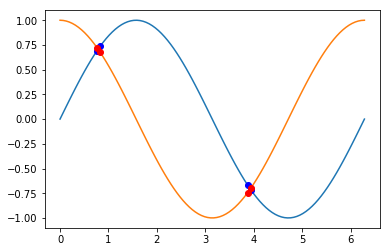

In [9]:
#4

import matplotlib.pyplot as plt 

#Create the array
a = np.linspace(0,2*mt.pi,100)
#Extract every 10th element using slice notation
b = a[::10]

#Reverse the array using slice notation
c = a[::-1]
#print(c)
mask = np.array([abs(np.sin(c) - np.cos(c)) < 0.1],dtype = bool)
points = c[mask[0]]
#print(points)


%matplotlib inline 

plt.plot(c,np.sin(c))
plt.plot(c,np.cos(c))
plt.plot(points,np.sin(points), 'bo')
plt.plot(points,np.cos(points), 'ro')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [16]:
mult_tab = np.fromfunction(lambda i, j: (i+1)*(j+1), (10,10))
#print(mult_tab)

#Find the trace of the matrix
trace = np.trace(mult_tab)
print("Trace of the multiplication table matrix:", trace)

#Extract the anti-diagonal
anti_mult_tab = mult_tab[::-1,]
anti_diag = anti_mult_tab.diagonal()
print("The anti diagonal is:",anti_diag)

#Extract the diagonal offset by 1 upwards
offset = mult_tab[([i for i in range(0,9)]),([j for j in range(1,10)])]
print("The diagonal offset array is:",offset)
#or
offset_diag = np.diag(mult_tab,1)
print("The diagonal offset array is:",offset_diag)


Trace of the multiplication table matrix: 385.0
The anti diagonal is: [ 10.  18.  24.  28.  30.  30.  28.  24.  18.  10.]
The diagonal offset array is: [  2.   6.  12.  20.  30.  42.  56.  72.  90.]
The diagonal offset array is: [  2.   6.  12.  20.  30.  42.  56.  72.  90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [11]:
distances = np.array([0,198,303,736,871,1175,1475,1544,1913,448])
grid = np.array(abs(distances-np.array([distances]).T))
print("Matrix of the distances in miles:\n", grid)
grid_km = (grid * 1.609344)
print("Matrix of the distances in km:\n", grid_km)


Matrix of the distances in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913  448]
 [ 198    0  105  538  673  977 1277 1346 1715  250]
 [ 303  105    0  433  568  872 1172 1241 1610  145]
 [ 736  538  433    0  135  439  739  808 1177  288]
 [ 871  673  568  135    0  304  604  673 1042  423]
 [1175  977  872  439  304    0  300  369  738  727]
 [1475 1277 1172  739  604  300    0   69  438 1027]
 [1544 1346 1241  808  673  369   69    0  369 1096]
 [1913 1715 1610 1177 1042  738  438  369    0 1465]
 [ 448  250  145  288  423  727 1027 1096 1465    0]]
Matrix of the distances in km:
 [[    0.         318.650112   487.631232  1184.477184  1401.738624
   1890.9792    2373.7824    2484.827136  3078.675072   720.986112]
 [  318.650112     0.         168.98112    865.827072  1083.088512
   1572.329088  2055.132288  2166.177024  2760.02496    402.336   ]
 [  487.631232   168.98112      0.         696.845952   914.107392
   1403.347968  1886.151168  1997.195904  2591.04384    233.35488

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [17]:
#7 primo tentativo (dcisamente ottimizzabile, prova tutti i divisori anziché uno solo)
mask = np.ones((100,),dtype = bool)

def prime_numbers(N):
    mask = np.ones((N,),dtype = bool)
    for i in range (1,N +1):
        for j in range(2,i):
            if i % j == 0:
                mask[i-1] = False
    primes = np.arange(1,101)[mask]
    return primes

primes = prime_numbers(100)
print(primes)
%timeit(prime_numbers(100))

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
221 µs ± 7.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
def primes_eratosthenes(N):
    primes = np.arange(1,N+1)
    for j in range (2,int(N / 2)):
        times = int(N / j) - 1
        num = j
        if primes[j - 1] == 0: j+=1
        else:
            for i in range(times):
                num += j
                primes[num - 1] = 0
    final_primes = primes[(primes != 0)]
    return final_primes

primes = primes_eratosthenes(100)
print(primes)

%timeit(primes_eratosthenes(100))

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
36 µs ± 943 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

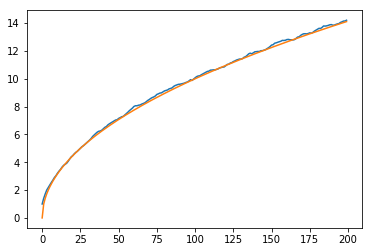

In [14]:
import numpy.random as npr
npr.seed(123)

walkers = 1000
steps = 200
walk = npr.randint(0,2,size=(walkers,steps))
walk[walk == 0] = -1 #,mette a -1 gli zeri in modo da avere solo -1 e 1
distances = np.zeros((walkers,steps))
for i in range(walkers):
    distances[i,0] = walk[i,0]
    for j in range(1,steps):
        distances[i,j] = distances[i,j-1] + walk[i,j]

distances *= distances
mean = np.sqrt(distances.mean(axis=0))

plt.plot(np.arange(steps),mean)
plt.plot(np.arange(steps),np.sqrt(np.arange(steps))) #just to prove the trend sqrt(t)-like

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

--2018-11-20 14:37:58--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2018-11-20 14:37:58--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc195a41086d312a3883ce3cc6f6.dl.dropboxusercontent.com/cd/0/inline/AV-lqB_DXeZjdvQfvvleHNa91McAafH7DANB7aVCVvjGq75ho6gB-TQXXb_i0SD9cBPmGH5D0DSdfg_tcr4nFSw6_majahPMQoSR41hf9jlQYABbsSlXH6c5V0iRMRK_2XSE2Yyw4ybNIun1gO9LOJP4tHAOl4548fwIqtjGOM_6h1aJmGX49eFP4m69Fmo3B0s/file [following]
--2018-11-20 14:37:59--  https://uc195a41086d312a3883ce3cc6f6.dl.dropboxusercontent.com/cd/0/inline/AV-lqB_DXeZjdvQfvvleHNa91McAafH7DANB7aV

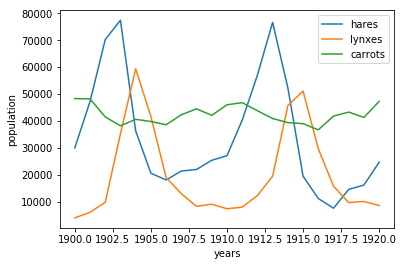

In [19]:
#dataset preparation and plot
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

datas=np.genfromtxt("populations.txt", unpack=True)

years = datas[0,]
hares = datas[1,]
lynxes = datas[2,]
carrots = datas[3,]

plt.plot(years,hares, label = "hares")
plt.plot(years,lynxes, label = "lynxes")
plt.plot(years, carrots, label = "carrots")
plt.xlabel("years")
plt.ylabel("population")
plt.legend()

#end of exercise in the cell below

In [20]:
#statistical properties

print("Hares")
for function in ['mean','median','std']:
    print (function, getattr(np, function)(hares))
print("Lyxes")
for function in ['mean','median','std']:
    print (function, getattr(np, function)(lynxes))
print("Carrots")
for function in ['mean','median','std']:
    print (function, getattr(np, function)(carrots))

Hares
mean 34080.952381
median 25400.0
std 20897.9064581
Lyxes
mean 20166.6666667
median 12300.0
std 16254.5915369
Carrots
mean 42400.0
median 41800.0
std 3322.50622558


In [21]:
#highest population per year

max_pop = datas.max(axis=0)
arg_max = datas.argmax(axis=0)
headers = ["years","hares","lynxes","carrots"]

for year in range(years.shape[0]):
    pop = max_pop[year]
    print("In %d the species with max population were %s with %d elements" %(years[year],headers[arg_max[year]],pop))


In 1900 the species with max population were carrots with 48300 elements
In 1901 the species with max population were carrots with 48200 elements
In 1902 the species with max population were hares with 70200 elements
In 1903 the species with max population were hares with 77400 elements
In 1904 the species with max population were lynxes with 59400 elements
In 1905 the species with max population were lynxes with 41700 elements
In 1906 the species with max population were carrots with 38600 elements
In 1907 the species with max population were carrots with 42300 elements
In 1908 the species with max population were carrots with 44500 elements
In 1909 the species with max population were carrots with 42100 elements
In 1910 the species with max population were carrots with 46000 elements
In 1911 the species with max population were carrots with 46800 elements
In 1912 the species with max population were hares with 57000 elements
In 1913 the species with max population were hares with 766